In [3]:
import pandas as pd

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
all_data=pd.concat([train_df, test_df],axis=0)
all_data.reset_index(drop=True)

Id Province_State Country_Region        Date  ConfirmedCases  \
0      1.0            NaN    Afghanistan  2020-01-22             0.0   
1      2.0            NaN    Afghanistan  2020-01-23             0.0   
2      3.0            NaN    Afghanistan  2020-01-24             0.0   
3      4.0            NaN    Afghanistan  2020-01-25             0.0   
4      5.0            NaN    Afghanistan  2020-01-26             0.0   
...    ...            ...            ...         ...             ...   
36715  NaN            NaN       Zimbabwe  2020-05-03             NaN   
36716  NaN            NaN       Zimbabwe  2020-05-04             NaN   
36717  NaN            NaN       Zimbabwe  2020-05-05             NaN   
36718  NaN            NaN       Zimbabwe  2020-05-06             NaN   
36719  NaN            NaN       Zimbabwe  2020-05-07             NaN   

       Fatalities  ForecastId  
0             0.0         NaN  
1             0.0         NaN  
2             0.0         NaN  
3             0.0         NaN  
4             0.0         NaN  
...           ...         ...  
36715         NaN     13154.0  
36716         NaN     13155.0  
36717         NaN     13156.0  
36718         NaN     13157.0  
36719         NaN     13158.0  

[36720 rows x 7 columns]

# Part:1 data cleaning

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
train_df['Country_Region'].nunique()

180

In [8]:
train_df['Province_State'].count()

10010

In [9]:
train_df.drop('Province_State', axis=1, inplace=True)

In [10]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [11]:
train_df.set_index('Date', inplace=True)
train_df

Id Country_Region  ConfirmedCases  Fatalities
Date                                                        
2020-01-22      1    Afghanistan             0.0         0.0
2020-01-23      2    Afghanistan             0.0         0.0
2020-01-24      3    Afghanistan             0.0         0.0
2020-01-25      4    Afghanistan             0.0         0.0
2020-01-26      5    Afghanistan             0.0         0.0
...           ...            ...             ...         ...
2020-04-03  32708       Zimbabwe             9.0         1.0
2020-04-04  32709       Zimbabwe             9.0         1.0
2020-04-05  32710       Zimbabwe             9.0         1.0
2020-04-06  32711       Zimbabwe            10.0         1.0
2020-04-07  32712       Zimbabwe            11.0         2.0

[23562 rows x 4 columns]

# Part:2 data analysis questions 
### Q1. Which countries has high number of cases?

### Q2. How is confirmed cases increases by day?

### Q3. What is fatality rate of confirmed cases?

### Q4. How is cases increasing by day of 1st reported case?

### Q5. Understanding data of India and UK and comparing it with the world?

### Q6. What is new rate of increase per case per day?

In [13]:
train_df.head()

Id Country_Region  ConfirmedCases  Fatalities
Date                                                     
2020-01-22   1    Afghanistan             0.0         0.0
2020-01-23   2    Afghanistan             0.0         0.0
2020-01-24   3    Afghanistan             0.0         0.0
2020-01-25   4    Afghanistan             0.0         0.0
2020-01-26   5    Afghanistan             0.0         0.0

In [14]:
import numpy as np

pivot= pd.pivot_table( train_df, columns='Country_Region', index='Date', values='ConfirmedCases',aggfunc=np.sum)


pivot_fatality= pd.pivot_table( train_df, columns='Country_Region', index='Date', values='Fatalities',aggfunc=np.sum)

country_list=[]
value_list=[]
fatality_list=[]

for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    fatality_list.append(pivot_fatality[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}
df=pd.DataFrame.from_dict(new_dict)
df.set_index('Country',inplace=True)
df




C:\Users\anish\AppData\Local\Temp\ipykernel_23920\3989242083.py:3: FutureWarning: The provided callable <function sum at 0x00000263F283EC00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot= pd.pivot_table( train_df, columns='Country_Region', index='Date', values='ConfirmedCases',aggfunc=np.sum)
C:\Users\anish\AppData\Local\Temp\ipykernel_23920\3989242083.py:6: FutureWarning: The provided callable <function sum at 0x00000263F283EC00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_fatality= pd.pivot_table( train_df, columns='Country_Region', index='Date', values='Fatalities',aggfunc=np.sum)


Confirmed  Fatality
Country                                
Afghanistan             423.0      14.0
Albania                 383.0      22.0
Algeria                1468.0     193.0
Andorra                 545.0      22.0
Angola                   17.0       2.0
...                       ...       ...
Venezuela               165.0       7.0
Vietnam                 249.0       0.0
West Bank and Gaza      261.0       1.0
Zambia                   39.0       1.0
Zimbabwe                 11.0       2.0

[180 rows x 2 columns]

In [15]:
sort_con=df.sort_values(by=['Confirmed'], ascending=False)
sort_fat=df.sort_values(by=['Fatality'], ascending=False)
top_10_fat= sort_fat.head(10)
top_10_con=sort_con.head(10)
print (top_10_con)
print (top_10_fat)

                Confirmed  Fatality
Country                            
US               396063.0   12717.0
Spain            141942.0   14045.0
Italy            135586.0   17127.0
France           110064.0   10343.0
Germany          107663.0    2016.0
China             82718.0    3335.0
Iran              62589.0    3872.0
United Kingdom    55947.0    6171.0
Turkey            34109.0     725.0
Switzerland       22253.0     821.0
                Confirmed  Fatality
Country                            
Italy            135586.0   17127.0
Spain            141942.0   14045.0
US               396063.0   12717.0
France           110064.0   10343.0
United Kingdom    55947.0    6171.0
Iran              62589.0    3872.0
China             82718.0    3335.0
Netherlands       19707.0    2108.0
Belgium           22194.0    2035.0
Germany          107663.0    2016.0


### first table shows top 10 countries with most confirmed cases (check "Confirmed" column)
### second table shows top 10 countries with most fatalities (check "Fatality" column)

### Now, plotting graphs of both tables

In [18]:
import plotly.express as px

In [19]:
fig = px.bar(top_10_con, x=top_10_con.index, y='Confirmed', 
             labels={'x':'Country'}, color="Confirmed", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Confirmed COVID-19 cases by country')
fig.show()

fig = px.bar(top_10_fat, x=top_10_fat.index, y='Fatality', 
             labels={'x':'Country'}, color="Fatality", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Fatality COVID-19 cases by country')
fig.show()


In [20]:
top_confirmed=df.sort_values(by='Confirmed',ascending=False)[:10]
top_confirmed

Confirmed  Fatality
Country                            
US               396063.0   12717.0
Spain            141942.0   14045.0
Italy            135586.0   17127.0
France           110064.0   10343.0
Germany          107663.0    2016.0
China             82718.0    3335.0
Iran              62589.0    3872.0
United Kingdom    55947.0    6171.0
Turkey            34109.0     725.0
Switzerland       22253.0     821.0

In [21]:
list_countries=list(top_confirmed.index)
list_countries.append('India')
list_countries.append('Pakistan')
list_countries

['US',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'China',
 'Iran',
 'United Kingdom',
 'Turkey',
 'Switzerland',
 'India',
 'Pakistan']

In [22]:
times_series_cntr = train_df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(list_countries)]
df_countries_tm

Country_Region  ConfirmedCases
Date                                      
2020-01-22           China           548.0
2020-01-22          France             0.0
2020-01-22         Germany             0.0
2020-01-22           India             0.0
2020-01-22            Iran             0.0
...                    ...             ...
2020-04-07           Spain        141942.0
2020-04-07     Switzerland         22253.0
2020-04-07          Turkey         34109.0
2020-04-07              US        396063.0
2020-04-07  United Kingdom         55947.0

[924 rows x 2 columns]

Text(0.5, 1.0, 'Cumulative trend plot for Confirmed Cases')

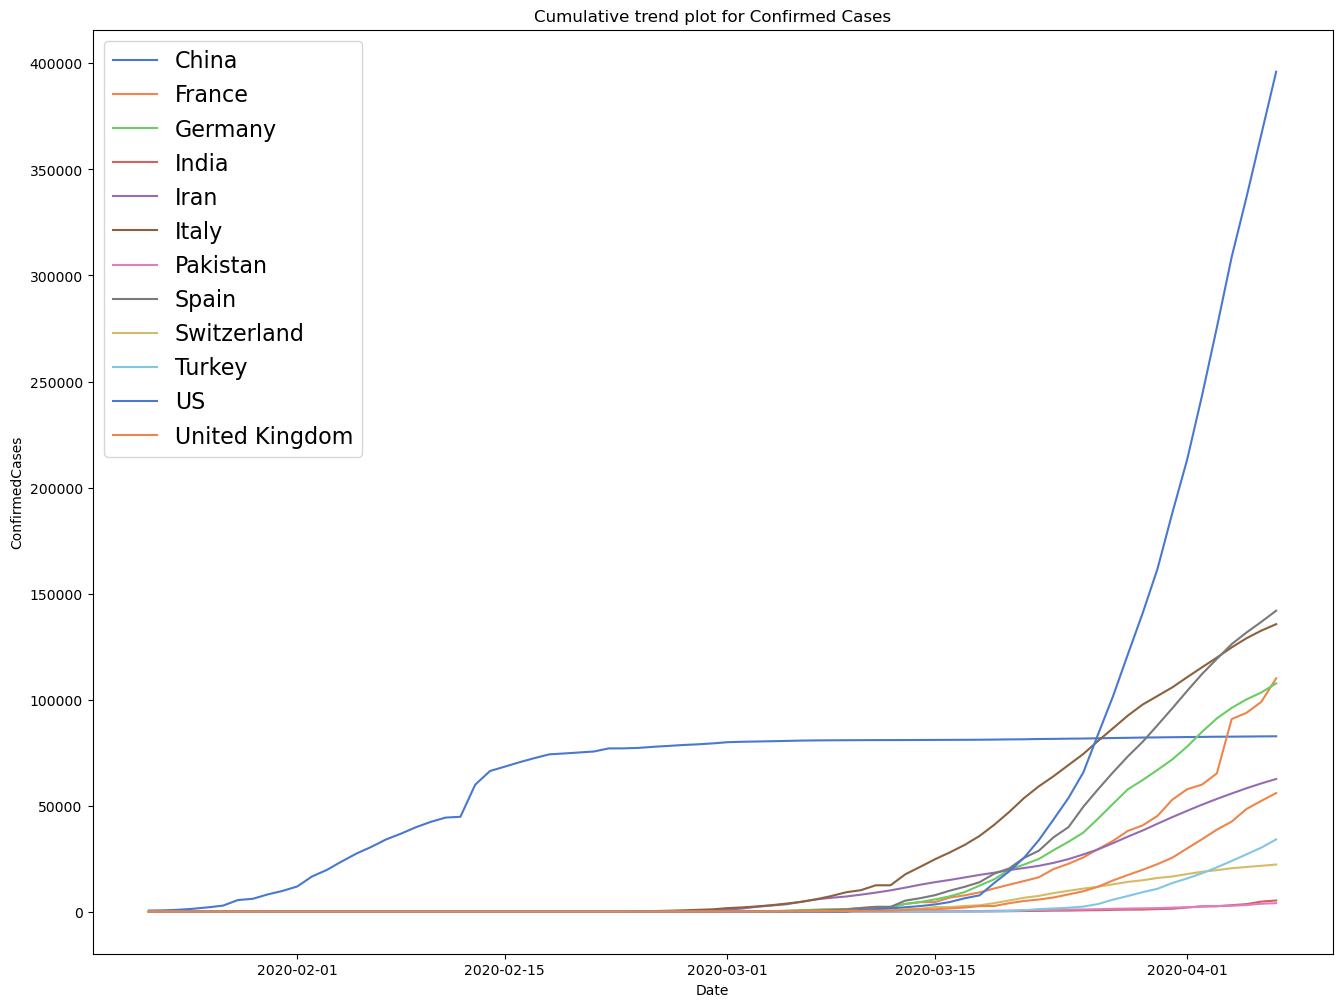

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,12))
ax=sns.lineplot(x=df_countries_tm.index,y='ConfirmedCases', hue='Country_Region', data=df_countries_tm,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 16})
plt.title('Cumulative trend plot for Confirmed Cases')
# plt.xticks(rotation=90); for better readablity

#### In the above plot, we can see that China has stabilized its new case reporting while all other countries are showing increase in trend. There is huge variance in dates from when there has been sudden increase in cases. UK has shown sudden increase in number of confirmed cases since 15 March 2020.

In [25]:
Confirm_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',
                             values='ConfirmedCases',aggfunc=np.sum)
Confirm_pivot

C:\Users\anish\AppData\Local\Temp\ipykernel_23920\1647311078.py:1: FutureWarning:

The provided callable <function sum at 0x00000263F283EC00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              0.0      0.0      0.0      0.0     0.0   
2020-01-23              0.0      0.0      0.0      0.0     0.0   
2020-01-24              0.0      0.0      0.0      0.0     0.0   
2020-01-25              0.0      0.0      0.0      0.0     0.0   
2020-01-26              0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
2020-04-03            281.0    304.0   1171.0    439.0     8.0   
2020-04-04            299.0    333.0   1251.0    466.0    10.0   
2020-04-05            349.0    361.0   1320.0    501.0    14.0   
2020-04-06            367.0    377.0   1423.0    525.0    16.0   
2020-04-07            423.0    383.0   1468.0    545.0    17.0   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-22                      0.0        0.0      0.0        0.0      0.0   
2020-01-23                      0.0        0.0      0.0        0.0      0.0   
2020-01-24                      0.0        0.0      0.0        0.0      0.0   
2020-01-25                      0.0        0.0      0.0        0.0      0.0   
2020-01-26                      0.0        0.0      0.0        4.0      0.0   
...                             ...        ...      ...        ...      ...   
2020-04-03                     15.0     1265.0    736.0     5330.0  11524.0   
2020-04-04                     15.0     1451.0    770.0     5550.0  11781.0   
2020-04-05                     15.0     1451.0    822.0     5687.0  12051.0   
2020-04-06                     15.0     1554.0    833.0     5797.0  12297.0   
2020-04-07                     19.0     1628.0    853.0     5895.0  12639.0   

Country_Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
2020-01-22      ...      0.0                   0.0             0.0      0.0   
2020-01-23      ...      0.0                   0.0             0.0      0.0   
2020-01-24      ...      0.0                   0.0             0.0      0.0   
2020-01-25      ...      0.0                   0.0             0.0      0.0   
2020-01-26      ...      0.0                   0.0             0.0      0.0   
...             ...      ...                   ...             ...      ...   
2020-04-03      ...   1072.0                1264.0         38689.0    369.0   
2020-04-04      ...   1225.0                1505.0         42476.0    400.0   
2020-04-05      ...   1308.0                1799.0         48434.0    400.0   
2020-04-06      ...   1319.0                2076.0         52277.0    406.0   
2020-04-07      ...   1462.0                2359.0         55947.0    424.0   

Country_Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
2020-01-22             0.0        0.0      0.0                 0.0     0.0   
2020-01-23             0.0        0.0      2.0                 0.0     0.0   
2020-01-24             0.0        0.0      2.0                 0.0     0.0   
2020-01-25             0.0        0.0      2.0                 0.0     0.0   
2020-01-26             0.0        0.0      2.0                 0.0     0.0   
...                    ...        ...      ...                 ...     ...   
2020-04-03           227.0      153.0    237.0               194.0    39.0   
2020-04-04           266.0      155.0    240.0               217.0    39.0   
2020-04-05           342.0      159.0    241.0               237.0    39.0   
2020-04-06           457.0      165.0    245.0               254.0    39.0   
2020-04-07           520.0      165.0    249.0               261.0    39.0   

Country_Region  Zimbabwe  
Date                      
2020-01-22      

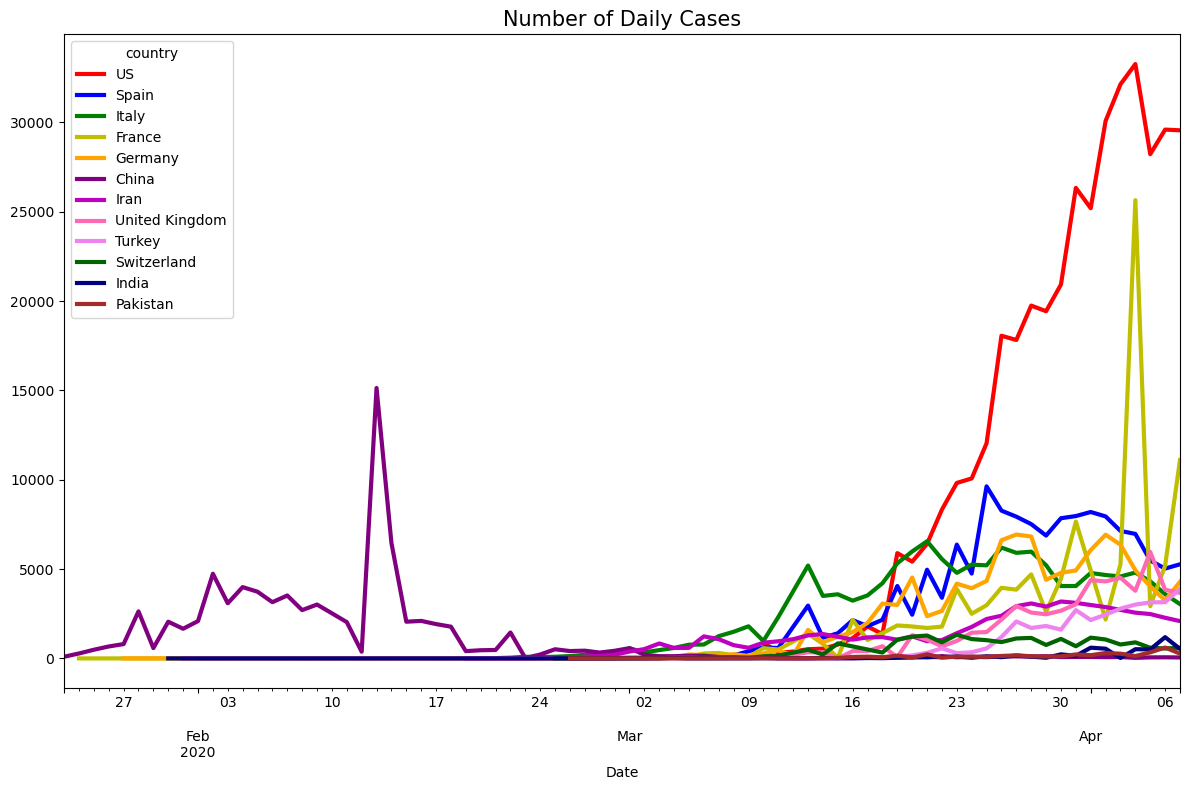

In [26]:
plt.figure(figsize=(12,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    confirm=Confirm_pivot[Confirm_pivot[country]>0] 
    confirm=Confirm_pivot[country].diff().fillna(0)
    confirm=confirm[confirm>0]
    confirm.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of Daily Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()    


# here, we observe that
### 1. china has a sudden increase on 14th feb
### 2. number of cases in USA increase exponentialy after 17th march
### 3. France has exponential increase after 2nd April

In [28]:
Confirm_pivot

Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              0.0      0.0      0.0      0.0     0.0   
2020-01-23              0.0      0.0      0.0      0.0     0.0   
2020-01-24              0.0      0.0      0.0      0.0     0.0   
2020-01-25              0.0      0.0      0.0      0.0     0.0   
2020-01-26              0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
2020-04-03            281.0    304.0   1171.0    439.0     8.0   
2020-04-04            299.0    333.0   1251.0    466.0    10.0   
2020-04-05            349.0    361.0   1320.0    501.0    14.0   
2020-04-06            367.0    377.0   1423.0    525.0    16.0   
2020-04-07            423.0    383.0   1468.0    545.0    17.0   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-22                      0.0        0.0      0.0        0.0      0.0   
2020-01-23                      0.0        0.0      0.0        0.0      0.0   
2020-01-24                      0.0        0.0      0.0        0.0      0.0   
2020-01-25                      0.0        0.0      0.0        0.0      0.0   
2020-01-26                      0.0        0.0      0.0        4.0      0.0   
...                             ...        ...      ...        ...      ...   
2020-04-03                     15.0     1265.0    736.0     5330.0  11524.0   
2020-04-04                     15.0     1451.0    770.0     5550.0  11781.0   
2020-04-05                     15.0     1451.0    822.0     5687.0  12051.0   
2020-04-06                     15.0     1554.0    833.0     5797.0  12297.0   
2020-04-07                     19.0     1628.0    853.0     5895.0  12639.0   

Country_Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
2020-01-22      ...      0.0                   0.0             0.0      0.0   
2020-01-23      ...      0.0                   0.0             0.0      0.0   
2020-01-24      ...      0.0                   0.0             0.0      0.0   
2020-01-25      ...      0.0                   0.0             0.0      0.0   
2020-01-26      ...      0.0                   0.0             0.0      0.0   
...             ...      ...                   ...             ...      ...   
2020-04-03      ...   1072.0                1264.0         38689.0    369.0   
2020-04-04      ...   1225.0                1505.0         42476.0    400.0   
2020-04-05      ...   1308.0                1799.0         48434.0    400.0   
2020-04-06      ...   1319.0                2076.0         52277.0    406.0   
2020-04-07      ...   1462.0                2359.0         55947.0    424.0   

Country_Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
2020-01-22             0.0        0.0      0.0                 0.0     0.0   
2020-01-23             0.0        0.0      2.0                 0.0     0.0   
2020-01-24             0.0        0.0      2.0                 0.0     0.0   
2020-01-25             0.0        0.0      2.0                 0.0     0.0   
2020-01-26             0.0        0.0      2.0                 0.0     0.0   
...                    ...        ...      ...                 ...     ...   
2020-04-03           227.0      153.0    237.0               194.0    39.0   
2020-04-04           266.0      155.0    240.0               217.0    39.0   
2020-04-05           342.0      159.0    241.0               237.0    39.0   
2020-04-06           457.0      165.0    245.0               254.0    39.0   
2020-04-07           520.0      165.0    249.0               261.0    39.0   

Country_Region  Zimbabwe  
Date                      
2020-01-22      

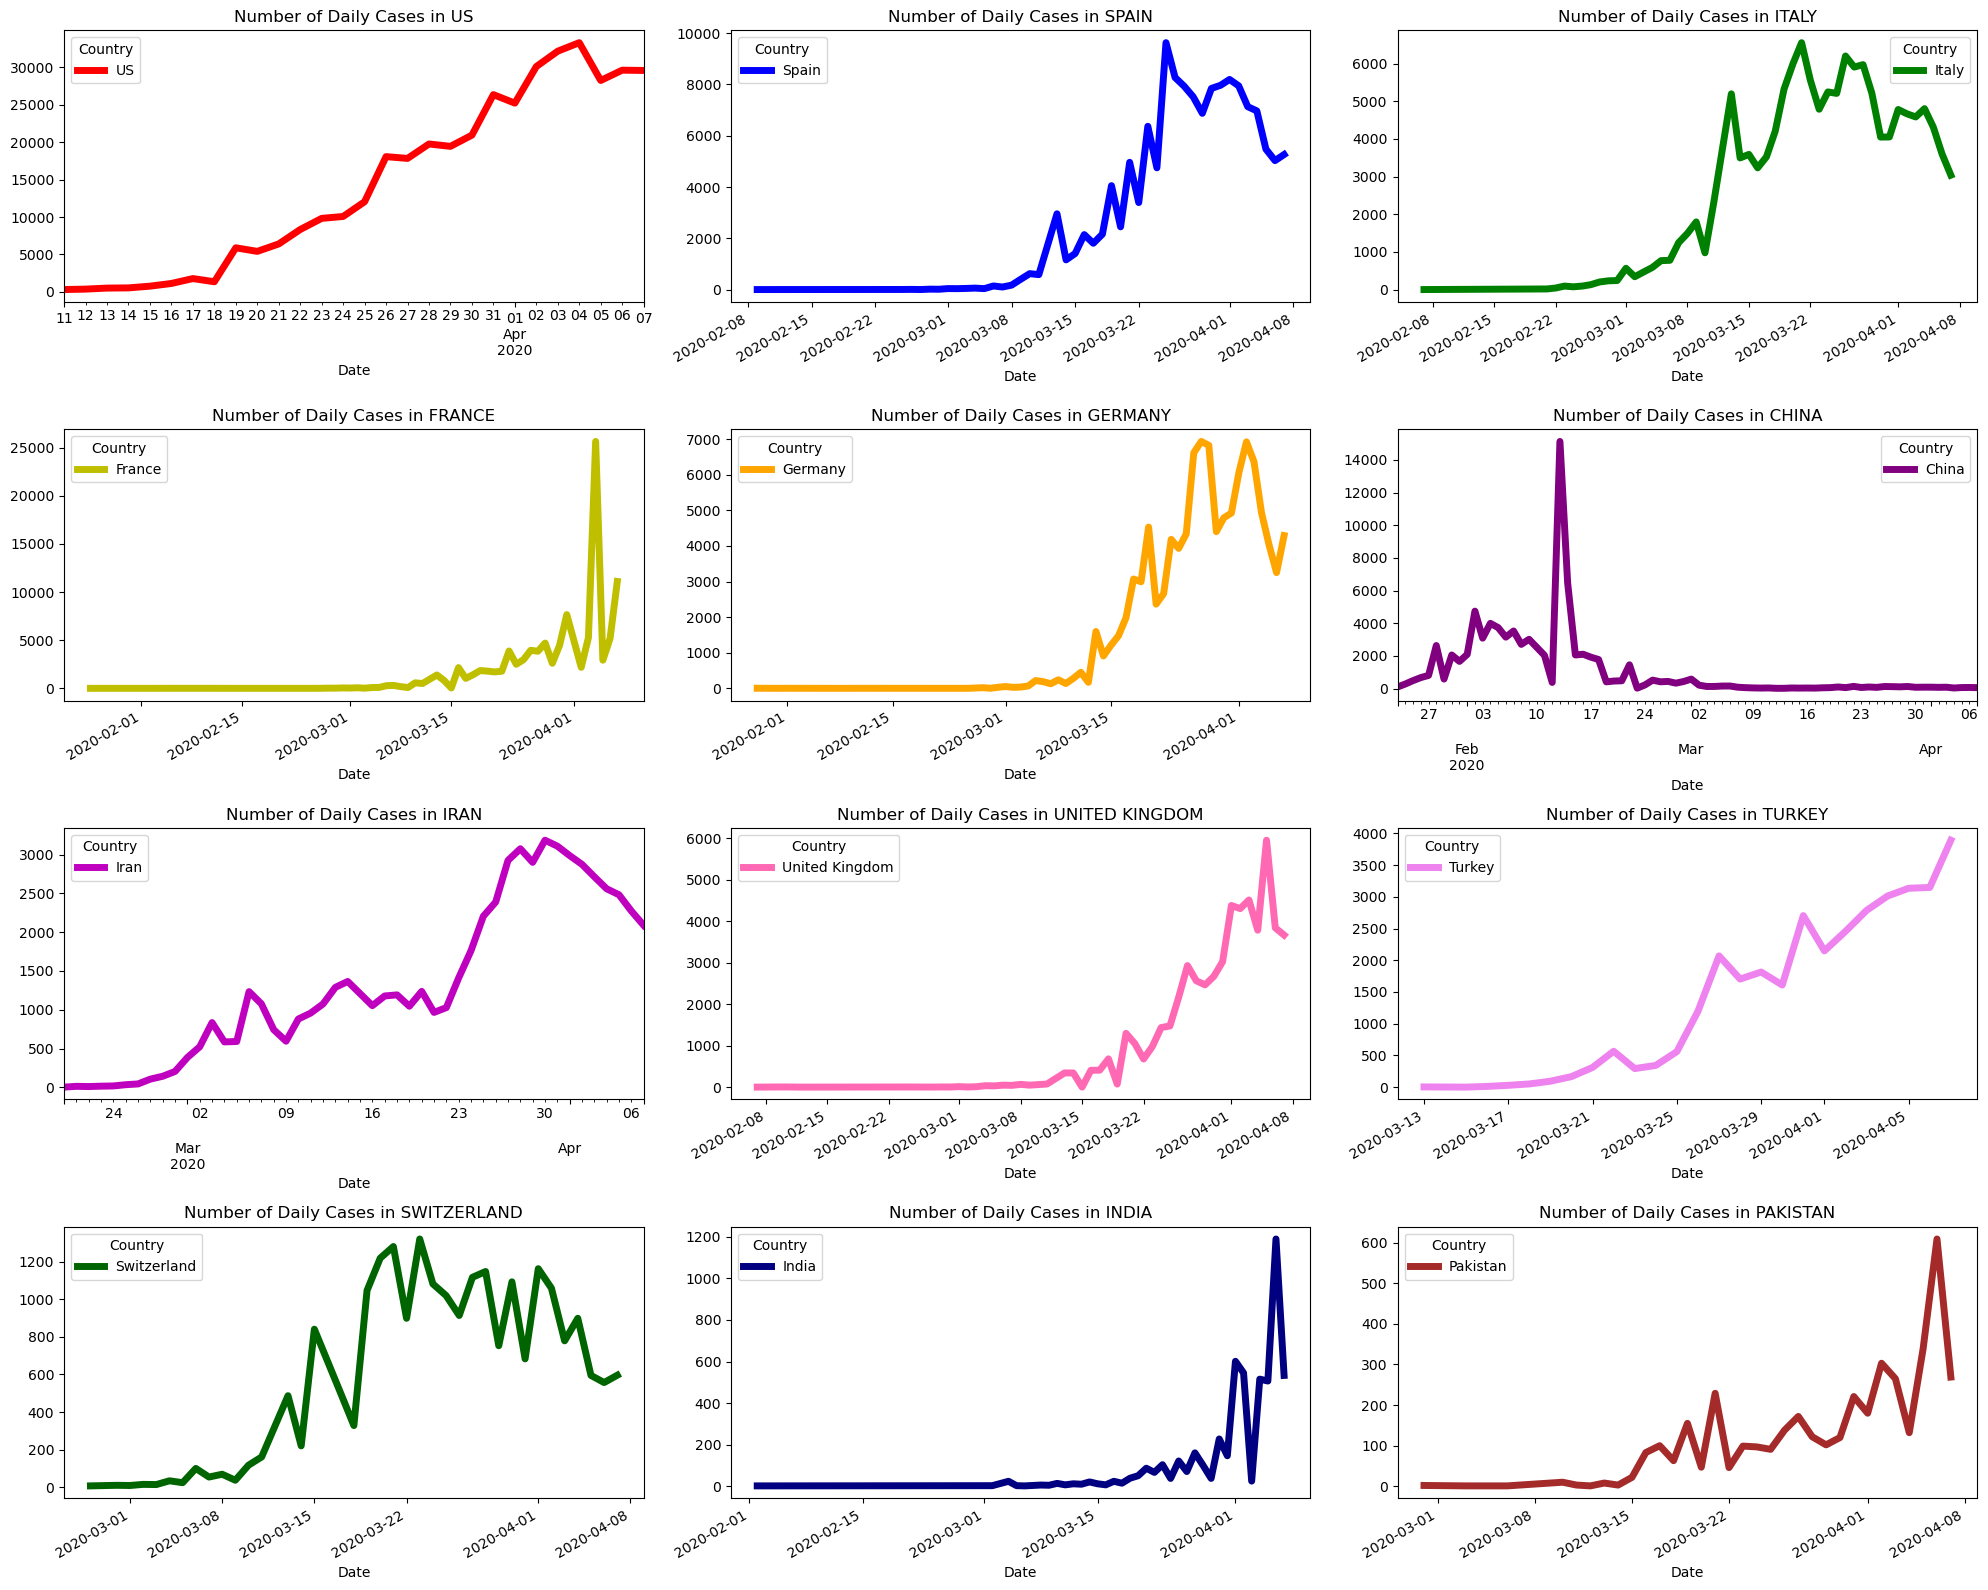

In [29]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()    

#### 1. we se USA having increasing umber of cases after 18th March
#### 2. China contolling the outbreak after 24th feb and having less variation in number of cases after 24
#### 3. India having a spike in number of cases late March

In [31]:
count=[]
maxi=[]
id_m=[]
for country in list_countries:
    id_max=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0).idxmax()
    maxim=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))
    count.append(country)
    maxi.append(maxim)
    id_m.append(id_max)
df_max_fat = pd.DataFrame(list(zip(count, maxi, id_m)), columns =['country', 'max_cases', 'date']) 
df_max_fat

df_max_fat['date']=df_max_fat['date'].astype(str)    
    
    
    
    

Maximum New Cases registered for US was 33264.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Spain was 9630.0 on 2020-03-25 00:00:00
Maximum New Cases registered for Italy was 6557.0 on 2020-03-21 00:00:00
Maximum New Cases registered for France was 25646.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Germany was 6933.0 on 2020-03-27 00:00:00
Maximum New Cases registered for China was 15136.0 on 2020-02-13 00:00:00
Maximum New Cases registered for Iran was 3186.0 on 2020-03-30 00:00:00
Maximum New Cases registered for United Kingdom was 5958.0 on 2020-04-05 00:00:00
Maximum New Cases registered for Turkey was 3892.0 on 2020-04-07 00:00:00
Maximum New Cases registered for Switzerland was 1321.0 on 2020-03-23 00:00:00
Maximum New Cases registered for India was 1190.0 on 2020-04-06 00:00:00
Maximum New Cases registered for Pakistan was 609.0 on 2020-04-06 00:00:00


## max no of cases in a single day of various countries along with date

#### Note, we also convert lists into pandas data frame so we can plot it

In [33]:
df_max_fat

country  max_cases        date
0               US    33264.0  2020-04-04
1            Spain     9630.0  2020-03-25
2            Italy     6557.0  2020-03-21
3           France    25646.0  2020-04-04
4          Germany     6933.0  2020-03-27
5            China    15136.0  2020-02-13
6             Iran     3186.0  2020-03-30
7   United Kingdom     5958.0  2020-04-05
8           Turkey     3892.0  2020-04-07
9      Switzerland     1321.0  2020-03-23
10           India     1190.0  2020-04-06
11        Pakistan      609.0  2020-04-06

In [34]:
fig = px.bar(df_max_fat, x="country", y='max_cases', text = 'date',
             labels={'x':'country'}, color="country", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Date on which a top 12 countries had Maximum confirmed cases')
fig.show()

# now we draw the same graphs and analysis for fatalities as well

In [36]:
times_series = train_df.groupby(['Date','Country_Region'])['Fatalities'].sum()\
                    .reset_index().set_index('Date')
df_countries = times_series[times_series['Country_Region'].isin(list_countries)]
df_countries

Country_Region  Fatalities
Date                                  
2020-01-22           China        17.0
2020-01-22          France         0.0
2020-01-22         Germany         0.0
2020-01-22           India         0.0
2020-01-22            Iran         0.0
...                    ...         ...
2020-04-07           Spain     14045.0
2020-04-07     Switzerland       821.0
2020-04-07          Turkey       725.0
2020-04-07              US     12717.0
2020-04-07  United Kingdom      6171.0

[924 rows x 2 columns]

Text(0.5, 1.0, 'Cumulative trend plot for fatalities')

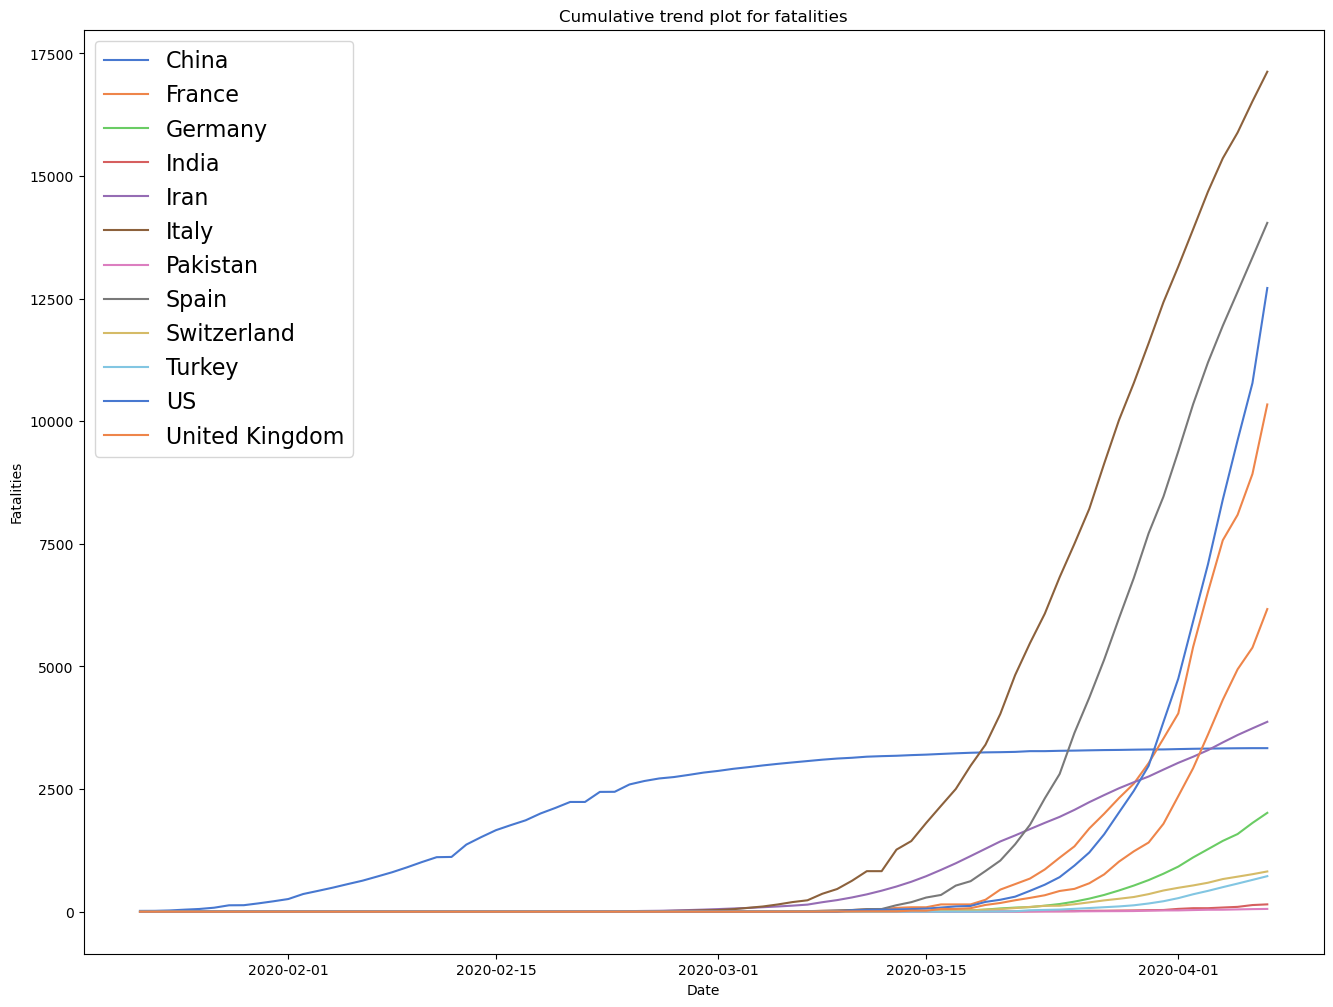

In [37]:
plt.figure(figsize=(16,12))
bx=sns.lineplot(x=df_countries.index,y='Fatalities', hue='Country_Region', data=df_countries,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 16})
plt.title('Cumulative trend plot for fatalities')

### we see that China is the only country whose graph was stabilized over time

In [39]:
fatality_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',
                             values='Fatalities',aggfunc=np.sum)
fatality_pivot

C:\Users\anish\AppData\Local\Temp\ipykernel_23920\984462142.py:1: FutureWarning:

The provided callable <function sum at 0x00000263F283EC00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              0.0      0.0      0.0      0.0     0.0   
2020-01-23              0.0      0.0      0.0      0.0     0.0   
2020-01-24              0.0      0.0      0.0      0.0     0.0   
2020-01-25              0.0      0.0      0.0      0.0     0.0   
2020-01-26              0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
2020-04-03              6.0     17.0    105.0     16.0     2.0   
2020-04-04              7.0     20.0    130.0     17.0     2.0   
2020-04-05              7.0     20.0    152.0     18.0     2.0   
2020-04-06             11.0     21.0    173.0     21.0     2.0   
2020-04-07             14.0     22.0    193.0     22.0     2.0   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-22                      0.0        0.0      0.0        0.0      0.0   
2020-01-23                      0.0        0.0      0.0        0.0      0.0   
2020-01-24                      0.0        0.0      0.0        0.0      0.0   
2020-01-25                      0.0        0.0      0.0        0.0      0.0   
2020-01-26                      0.0        0.0      0.0        0.0      0.0   
...                             ...        ...      ...        ...      ...   
2020-04-03                      0.0       39.0      7.0       28.0    168.0   
2020-04-04                      0.0       43.0      7.0       30.0    186.0   
2020-04-05                      0.0       44.0      7.0       35.0    204.0   
2020-04-06                      0.0       48.0      8.0       40.0    220.0   
2020-04-07                      1.0       56.0      8.0       45.0    243.0   

Country_Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
2020-01-22      ...      0.0                   0.0             0.0      0.0   
2020-01-23      ...      0.0                   0.0             0.0      0.0   
2020-01-24      ...      0.0                   0.0             0.0      0.0   
2020-01-25      ...      0.0                   0.0             0.0      0.0   
2020-01-26      ...      0.0                   0.0             0.0      0.0   
...             ...      ...                   ...             ...      ...   
2020-04-03      ...     27.0                   9.0          3611.0      4.0   
2020-04-04      ...     32.0                  10.0          4320.0      5.0   
2020-04-05      ...     37.0                  10.0          4943.0      5.0   
2020-04-06      ...     38.0                  11.0          5385.0      6.0   
2020-04-07      ...     45.0                  12.0          6171.0      7.0   

Country_Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
2020-01-22             0.0        0.0      0.0                 0.0     0.0   
2020-01-23             0.0        0.0      0.0                 0.0     0.0   
2020-01-24             0.0        0.0      0.0                 0.0     0.0   
2020-01-25             0.0        0.0      0.0                 0.0     0.0   
2020-01-26             0.0        0.0      0.0                 0.0     0.0   
...                    ...        ...      ...                 ...     ...   
2020-04-03             2.0        7.0      0.0                 1.0     1.0   
2020-04-04             2.0        7.0      0.0                 1.0     1.0   
2020-04-05             2.0        7.0      0.0                 1.0     1.0   
2020-04-06             2.0        7.0      0.0                 1.0     1.0   
2020-04-07             2.0        7.0      0.0                 1.0     1.0   

Country_Region  Zimbabwe  
Date                      
2020-01-22      

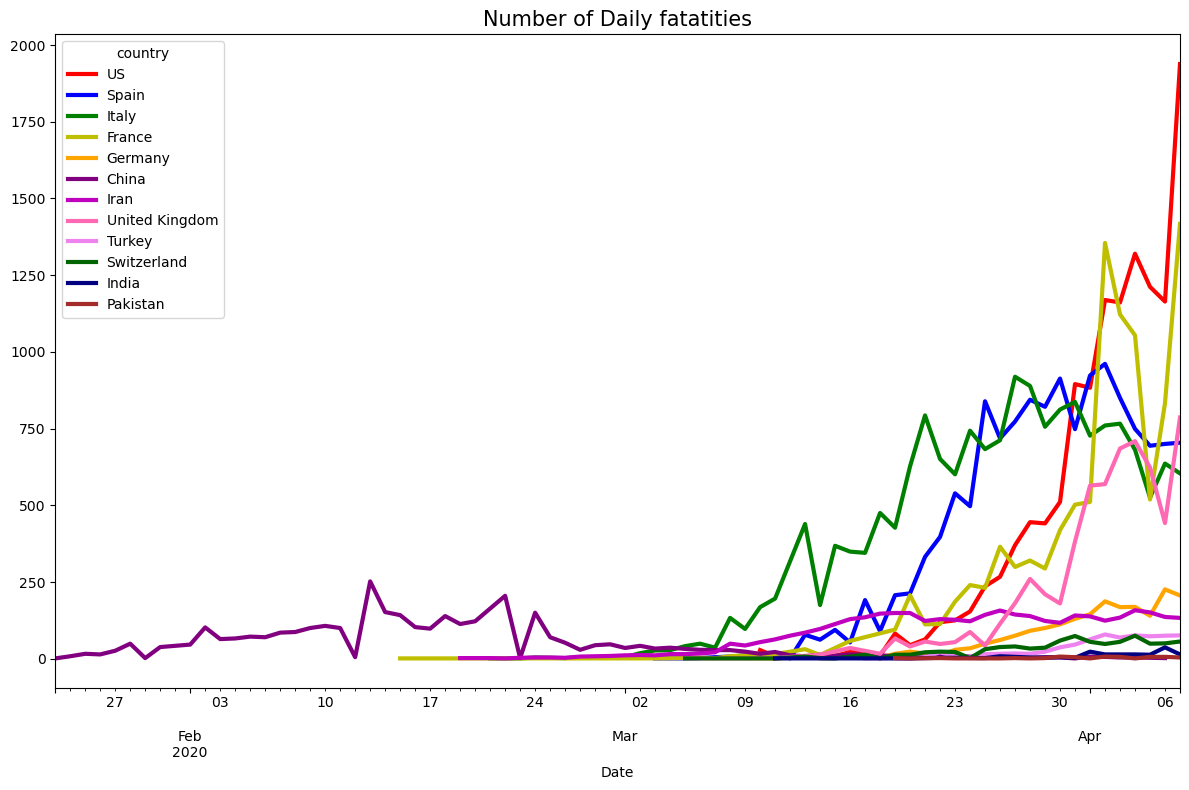

In [40]:
plt.figure(figsize=(12,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    fatality=fatality_pivot[fatality_pivot[country]>0] 
    fatality = fatality_pivot[country].diff().fillna(0)
    fatality=fatality[fatality>0]
    fatality.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of Daily fatatities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()  

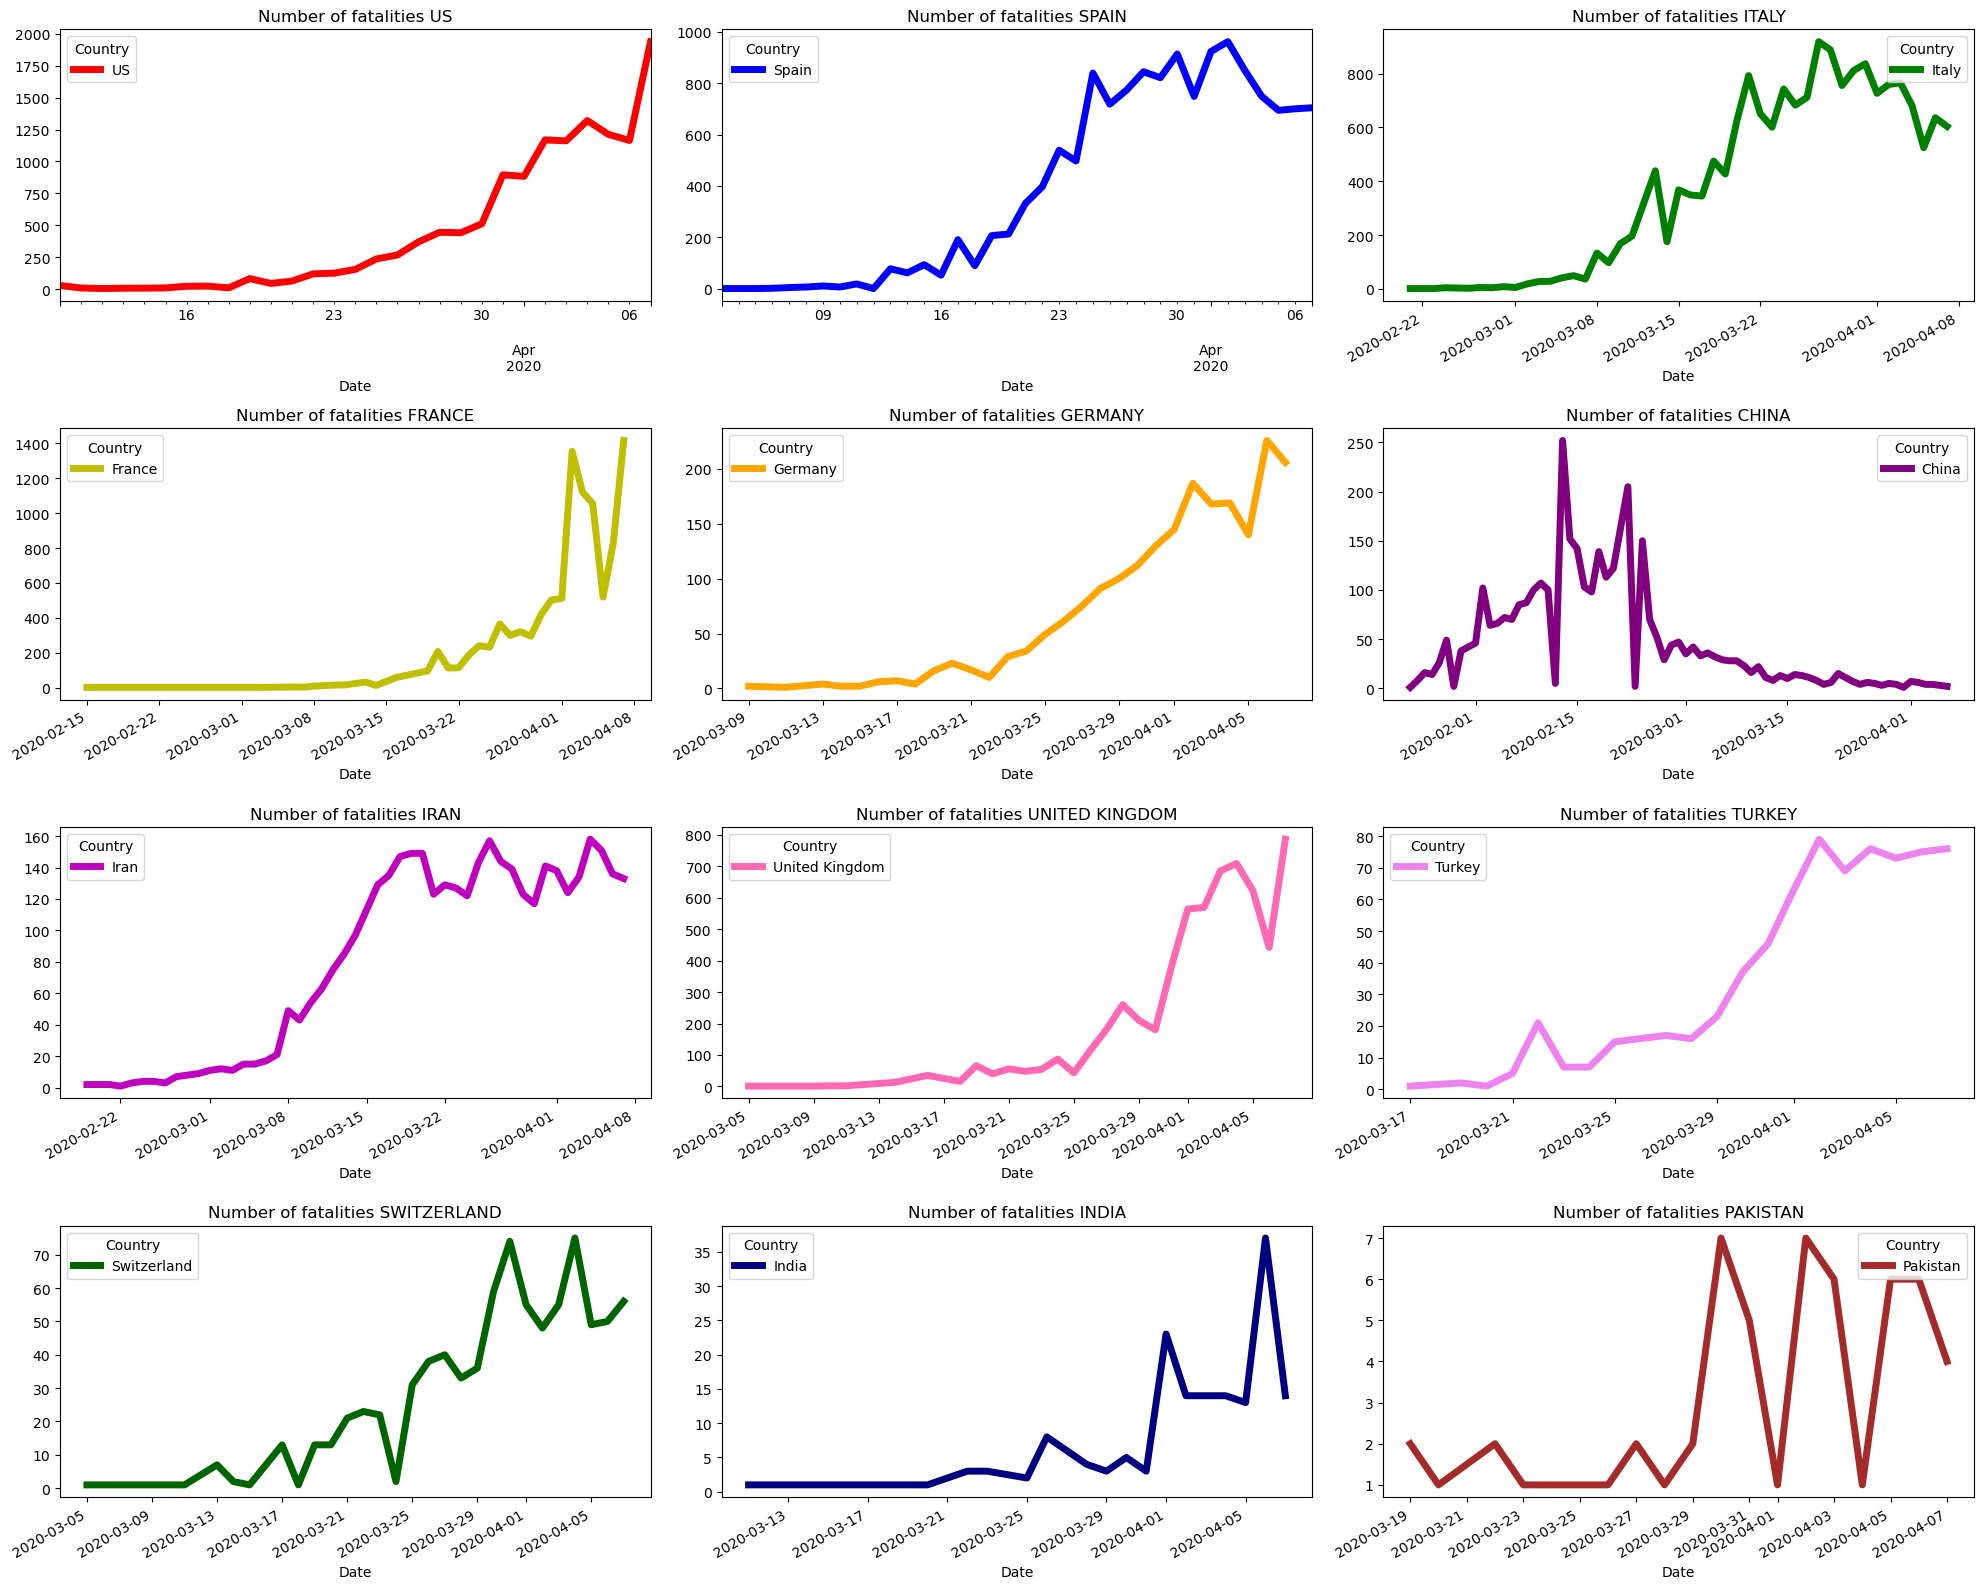

In [41]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    ok=fatality_pivot[fatality_pivot[country]>0]
    ok=fatality_pivot[country].diff().fillna(0)
    ok=ok[ok>0]
    plt.subplot(4,3,i+1)
    ok.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of fatalities {}'.format(country.upper()))
plt.tight_layout()    

In [42]:
countf=[]
maxif=[]
id_mf=[]
for country in list_countries:
    id_maxf=fatality_pivot[fatality_pivot[country]>0][country].diff().fillna(0).idxmax()
    maximf=fatality_pivot[fatality_pivot[country]>0][country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maximf,id_maxf))
    countf.append(country)
    maxif.append(maximf)
    id_mf.append(id_maxf)
df_max = pd.DataFrame(list(zip(countf, maxif, id_mf)), columns =['country', 'max_fat', 'date']) 
df_max

df_max['date']=df_max['date'].astype(str)  

Maximum New Cases registered for US was 1938.0 on 2020-04-07 00:00:00
Maximum New Cases registered for Spain was 961.0 on 2020-04-02 00:00:00
Maximum New Cases registered for Italy was 919.0 on 2020-03-27 00:00:00
Maximum New Cases registered for France was 1417.0 on 2020-04-07 00:00:00
Maximum New Cases registered for Germany was 226.0 on 2020-04-06 00:00:00
Maximum New Cases registered for China was 252.0 on 2020-02-13 00:00:00
Maximum New Cases registered for Iran was 158.0 on 2020-04-04 00:00:00
Maximum New Cases registered for United Kingdom was 786.0 on 2020-04-07 00:00:00
Maximum New Cases registered for Turkey was 79.0 on 2020-04-02 00:00:00
Maximum New Cases registered for Switzerland was 75.0 on 2020-04-04 00:00:00
Maximum New Cases registered for India was 37.0 on 2020-04-06 00:00:00
Maximum New Cases registered for Pakistan was 7.0 on 2020-03-30 00:00:00


In [43]:
df_max

country  max_fat        date
0               US   1938.0  2020-04-07
1            Spain    961.0  2020-04-02
2            Italy    919.0  2020-03-27
3           France   1417.0  2020-04-07
4          Germany    226.0  2020-04-06
5            China    252.0  2020-02-13
6             Iran    158.0  2020-04-04
7   United Kingdom    786.0  2020-04-07
8           Turkey     79.0  2020-04-02
9      Switzerland     75.0  2020-04-04
10           India     37.0  2020-04-06
11        Pakistan      7.0  2020-03-30

In [44]:
fig = px.bar(df_max, x="country", y='max_fat', text = 'date',
             labels={'x':'country'}, color="country", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Date on which a top 12 countries had Maximum fatilities')
fig.show()

Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

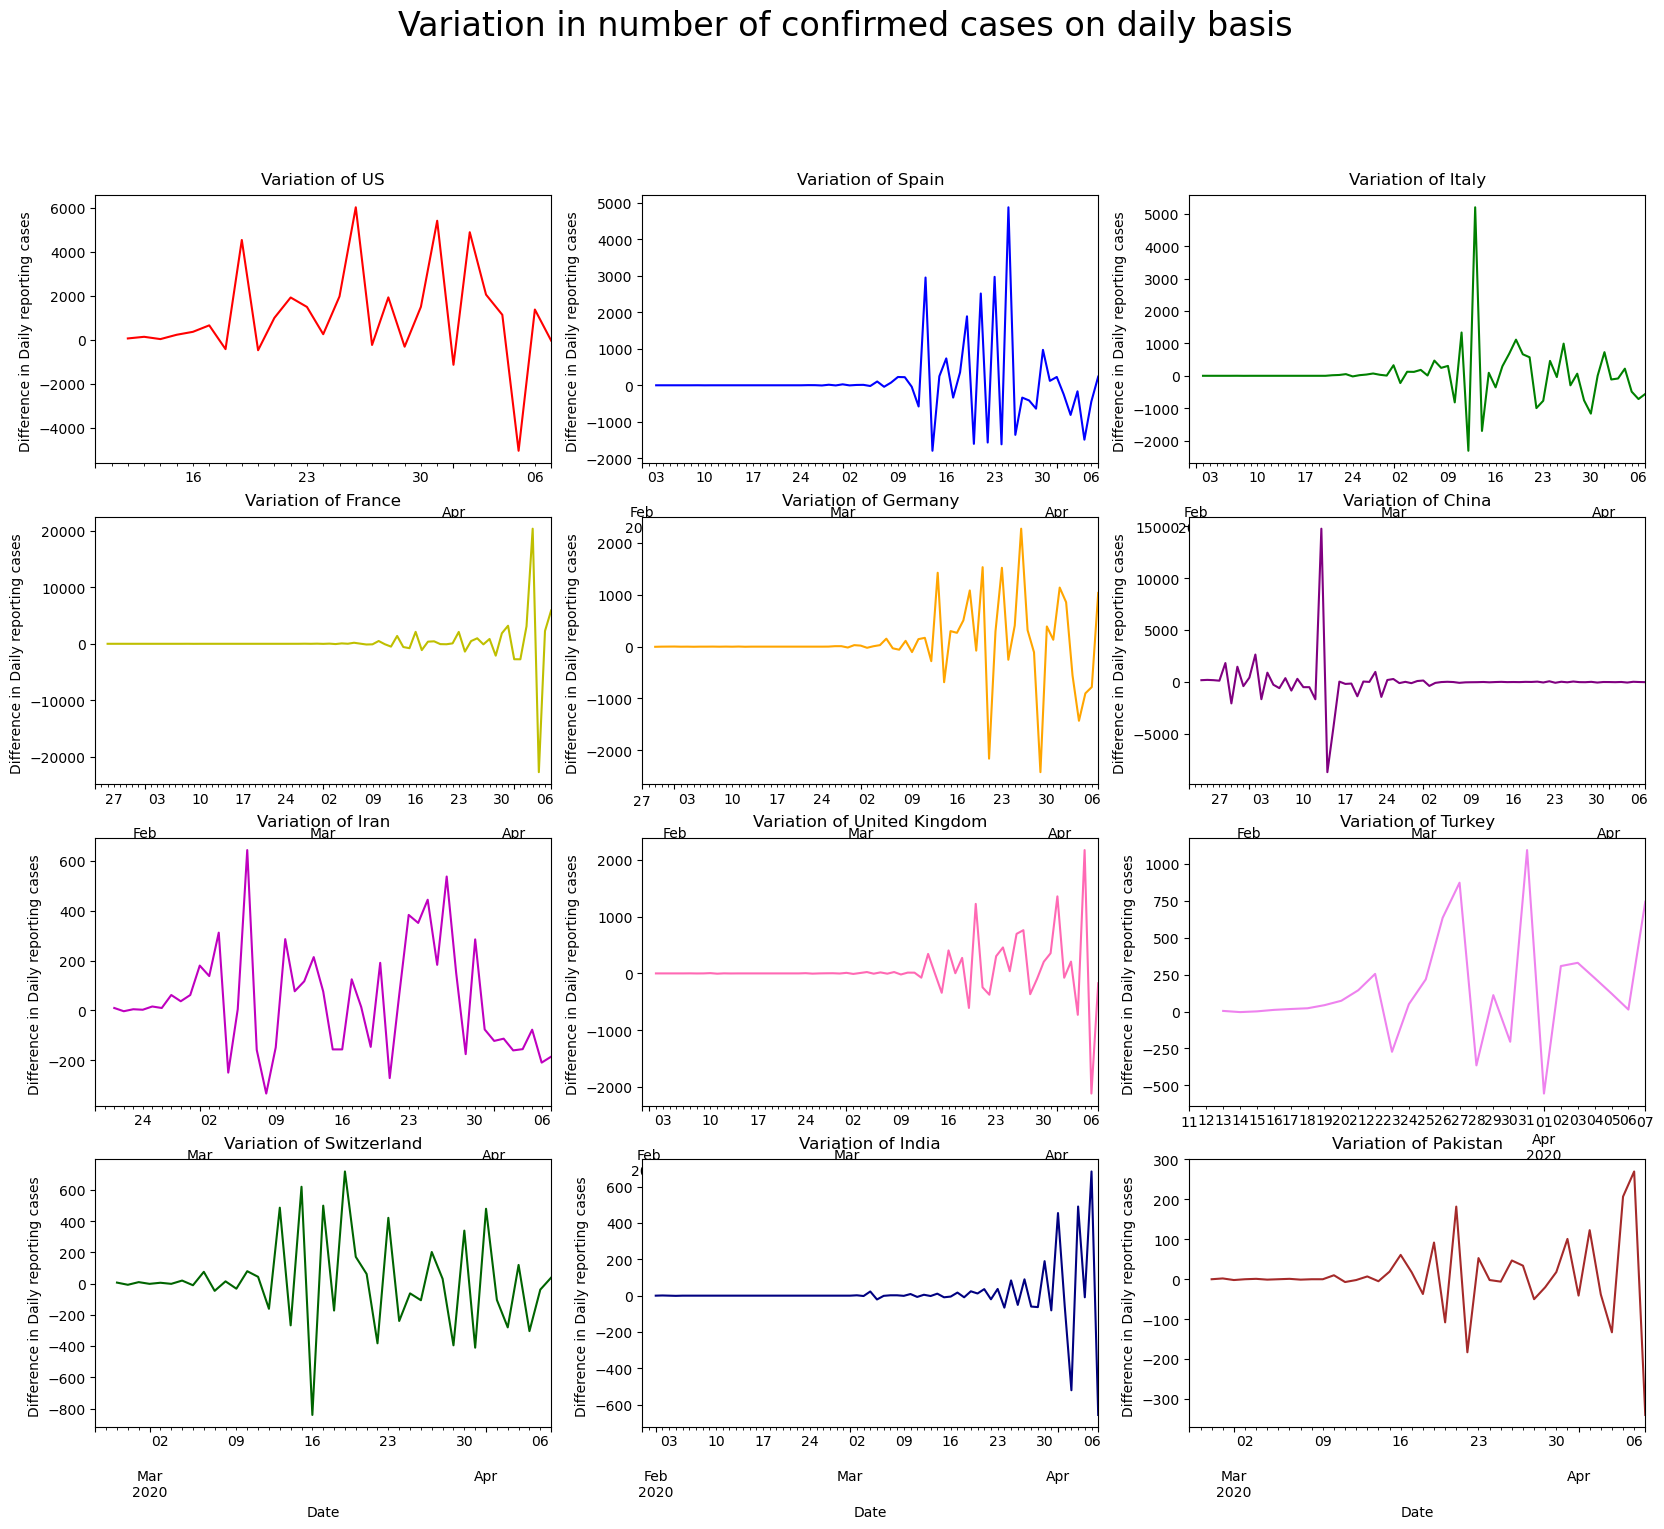

In [45]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    plt.subplot(4,3,i+1)
    train_df[(train_df['Country_Region']==country)&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().diff().diff().plot(color=colors[i])
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom')
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')
     

### from the above variance graph we observe that:
### 1.countries generally show incrasing number of cases after late March
### 2. China is an exception because it had a spike during mid feb but the number of cases dropped and became significantly less after march and then decreased even further into April

# Part 3: Exploratory Data Analysis



### Q3.1. Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)

### Q3.2. Fatalities trend from first day of incidence

### Q3.3. Comparision of Confirmed Cases and Fatalities worldwide trend on normal and log scale

### Q3.4. Corelation between ConfirmedCases and Fatalities worldwide

### Q3.5. Confirmed Cases worldwide trend (without China)

### Q3.5. Fatalities Cases worldwide trend (without China)

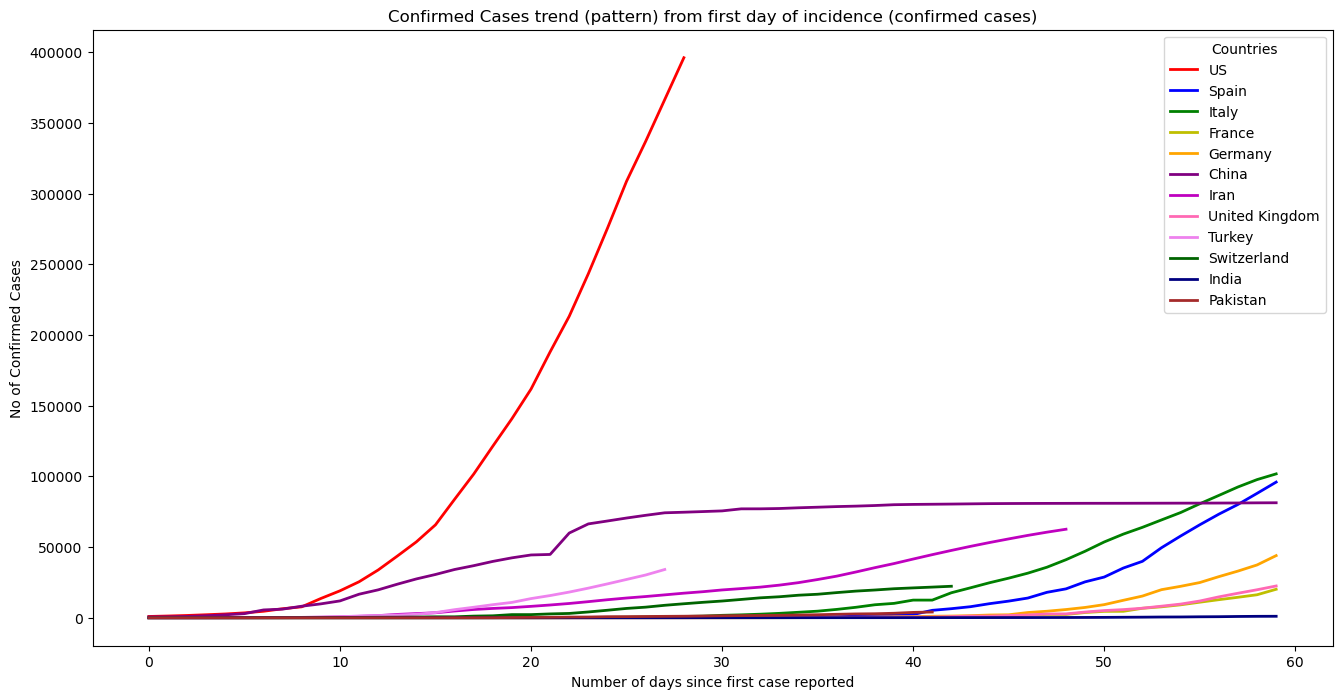

In [94]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)')
for i,country in enumerate(list_countries):
    confirm_group = train_df[
    (train_df['Country_Region'] == country) & 
    (train_df['ConfirmedCases'] != 0)].groupby('Date')['ConfirmedCases'].sum()
     # this retunns a panda series and not a dataframe
    confirm_value = list(confirm_group.values)
     # converts panda series into numpy array, we do not have any columns here
    plot_value=confirm_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case reported")
    plt.ylabel("No of Confirmed Cases")

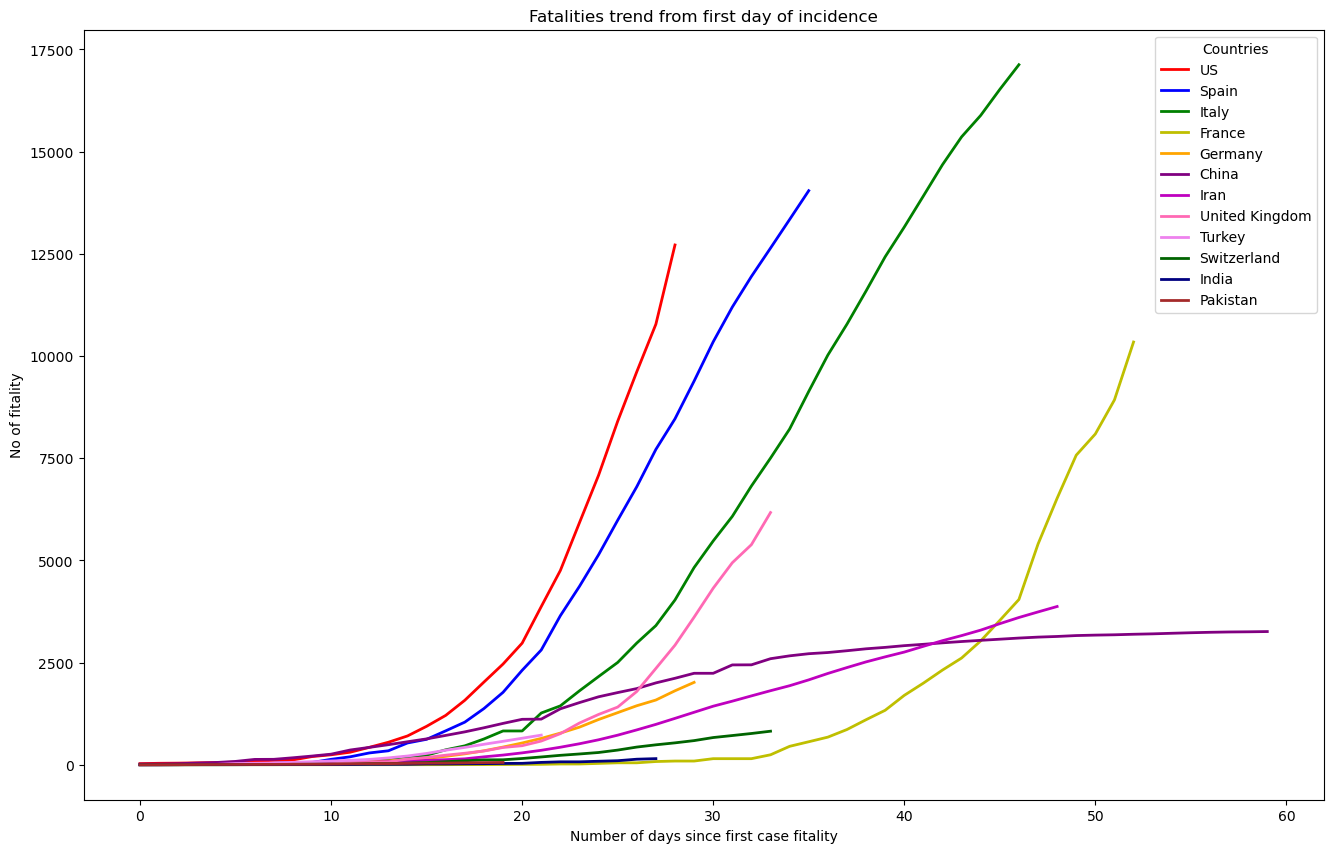

In [90]:
plt.figure(figsize=(16,10))
plt.title('Fatalities trend from first day of incidence')
for i,country in enumerate(list_countries):
    fatal_group=train_df[(train_df['Country_Region']==country)&train_df['Fatalities']!=0].groupby('Date').agg({'Fatalities':['sum']})
    # the above command returns a data frame having a column Fatalities and a sub column sum
    fatal_value=list(fatal_group.Fatalities['sum'])
    # here, we are refering to a sub column ['sum']
    plot_value=fatal_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case fitality")
    plt.ylabel("No of fitality")

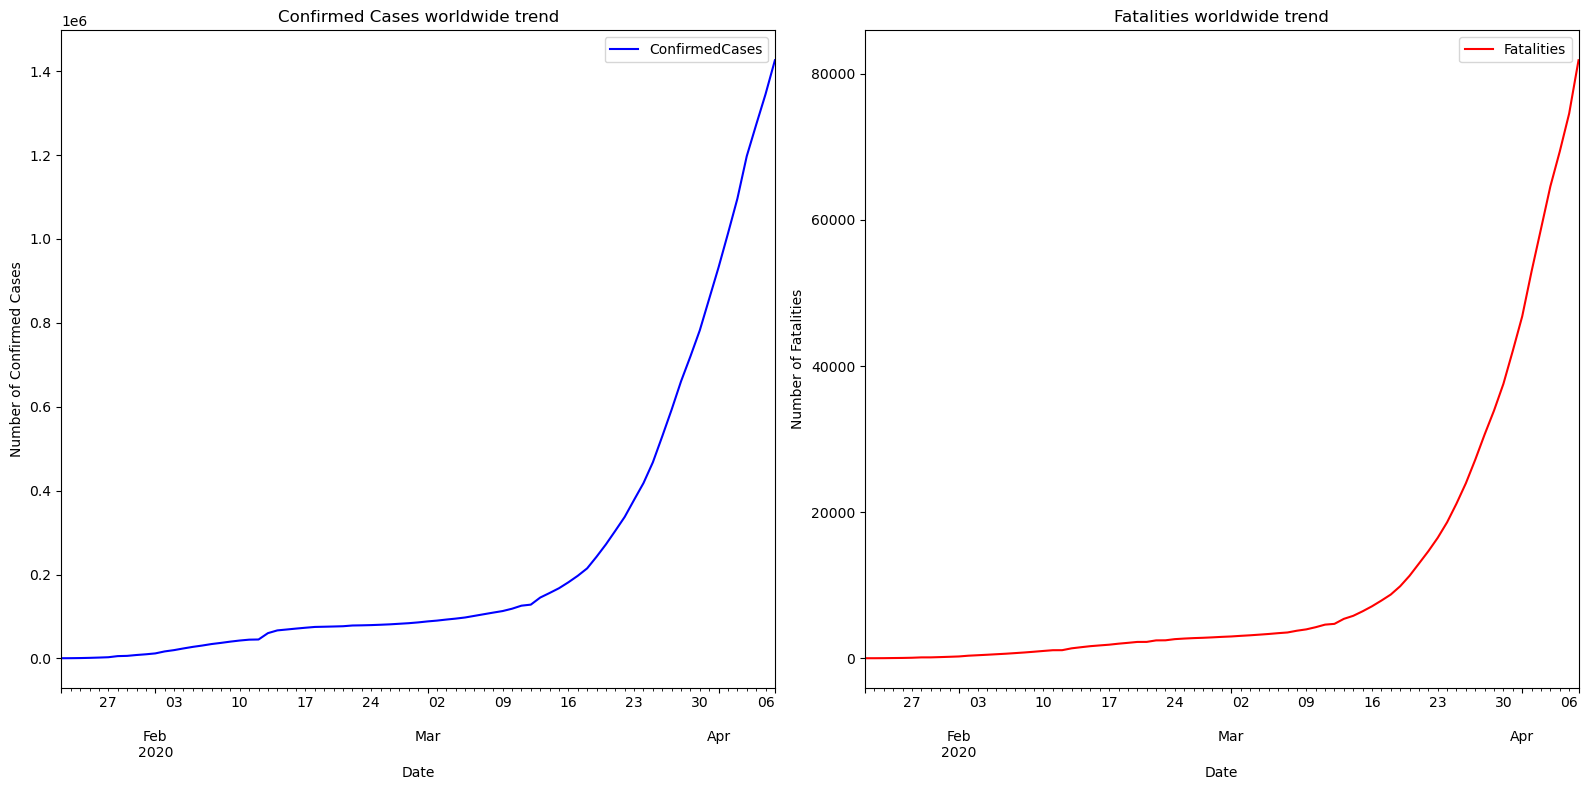

In [106]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")
plt.legend()
plt.tight_layout()

### the confirmed cases and the fatalities curve are similar

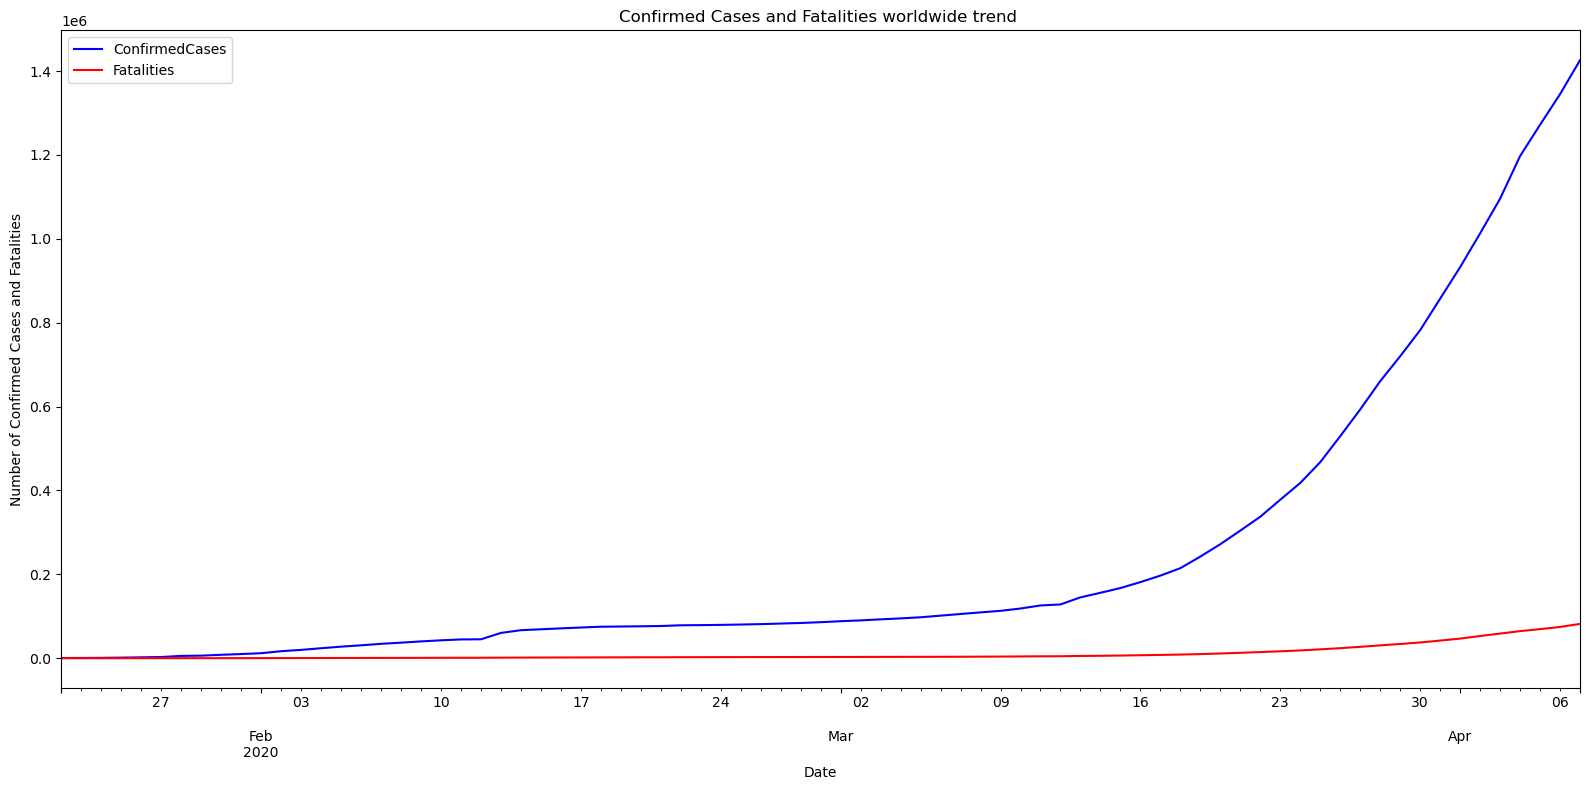

In [111]:
plt.figure(figsize=(16,8))
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()

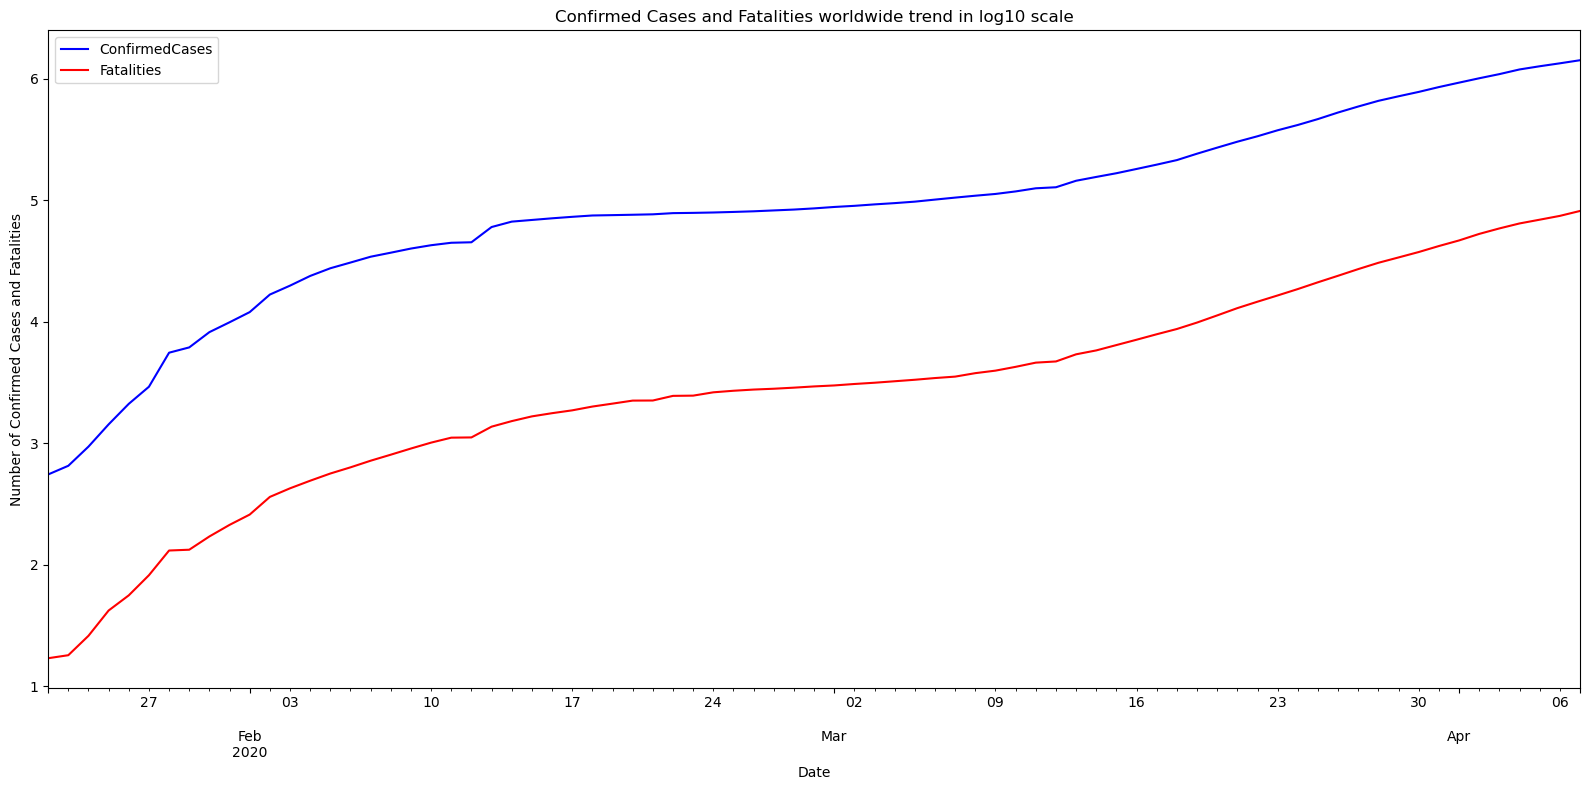

In [113]:
plt.figure(figsize=(16,8))
np.log10(train_df.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train_df.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()

### we see that the peaks of both graohs are similar but on a diffrent log scale

In [116]:
from bokeh.plotting import figure, save
import plotly.graph_objects as go

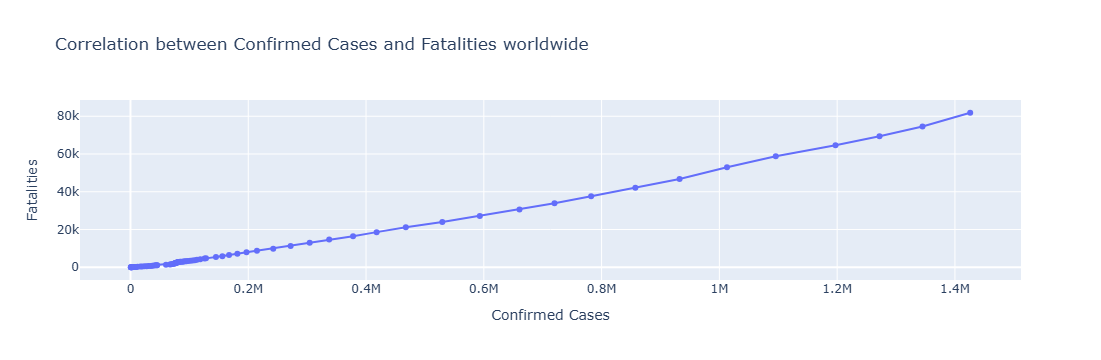

R-squared value: 0.9933


In [124]:
cc = train_df.groupby('Date')['ConfirmedCases'].sum()
ft = train_df.groupby('Date')['Fatalities'].sum()

# Scatter plot: Confirmed Cases vs. Fatalities
fig = go.Figure(data=go.Scatter(x=cc.values, y=ft.values, mode='lines+markers')) 

# Edit the layout
fig.update_layout(
    title='Correlation between Confirmed Cases and Fatalities worldwide',
    xaxis_title='Confirmed Cases',
    yaxis_title='Fatalities'
)
fig.show()

# Compute correlation
correlation_matrix = np.corrcoef(cc.values, ft.values)  # Convert Series to NumPy arrays
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy ** 2

print(f"R-squared value: {r_squared:.4f}")

### we that both are highly correlated with coefficent of 0.99

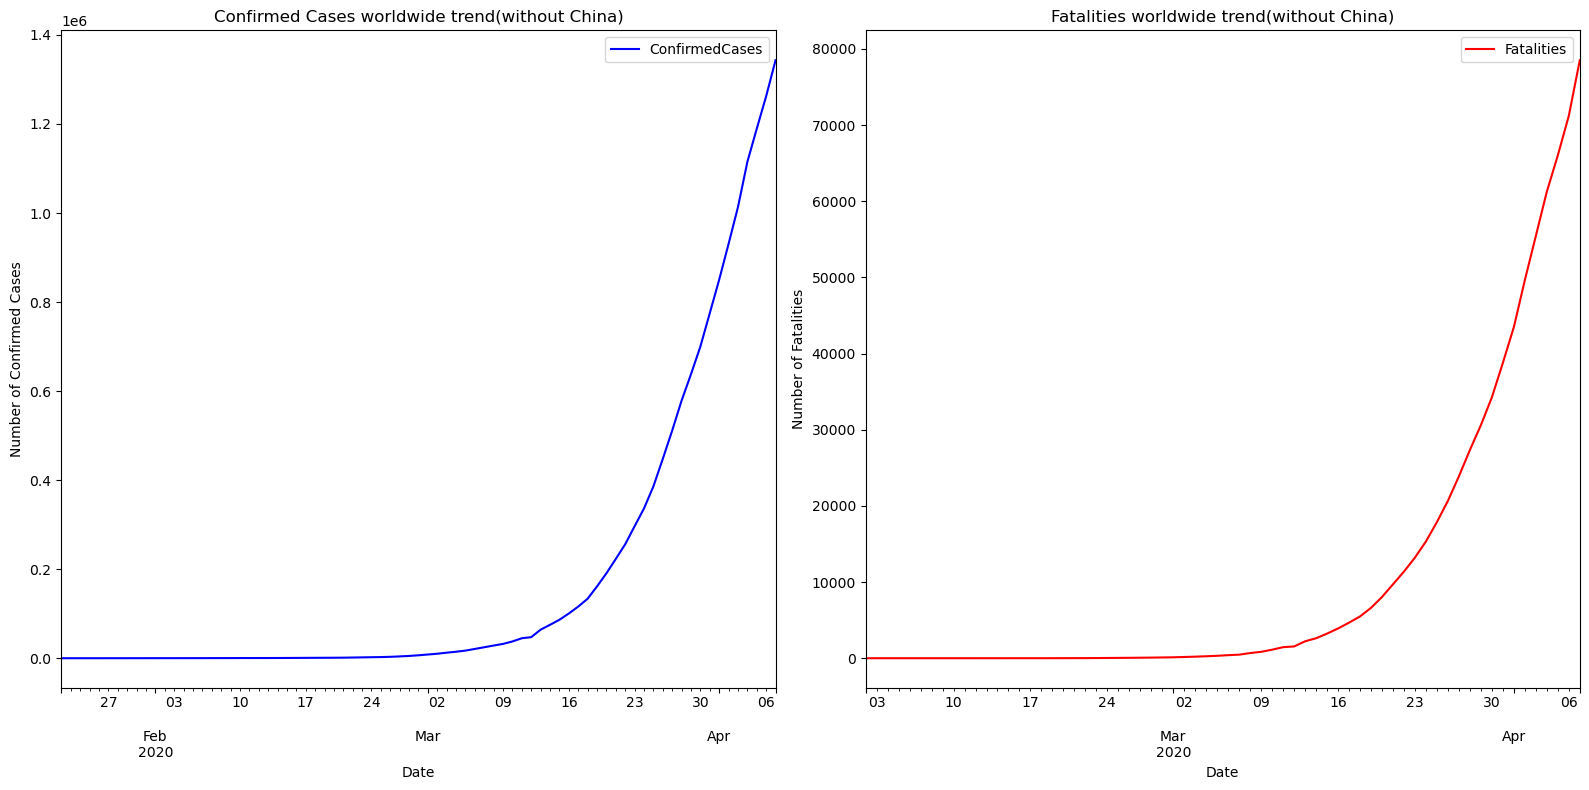

In [127]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend(without China)')

plt.subplot(1,2,2)
train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()

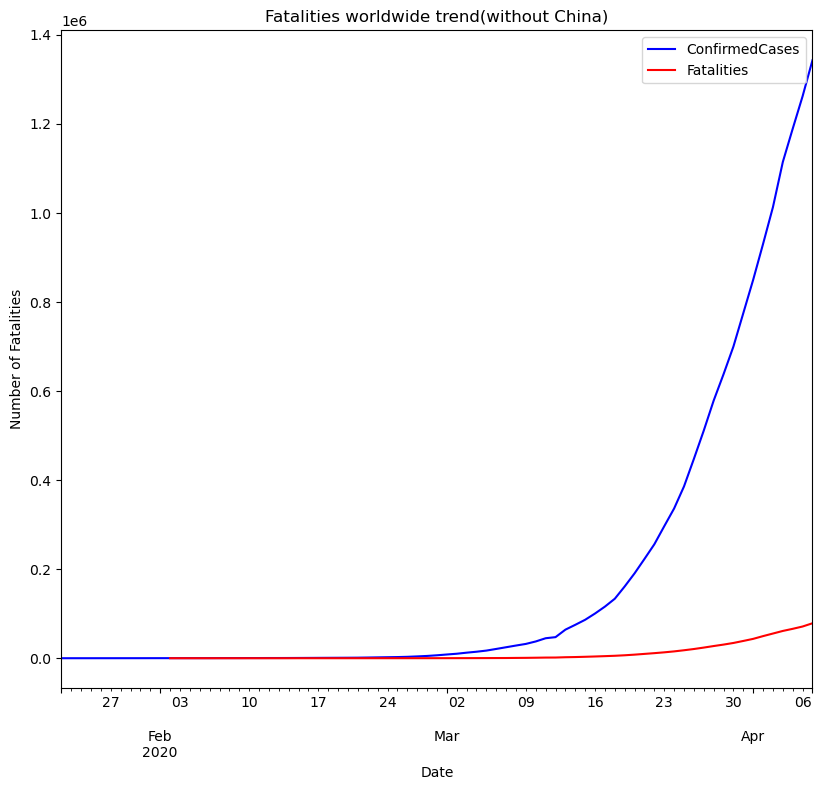

In [129]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()

### when we exclude China the graphs become even more correlated. Here we see that first fatality occured around 2nd Feb

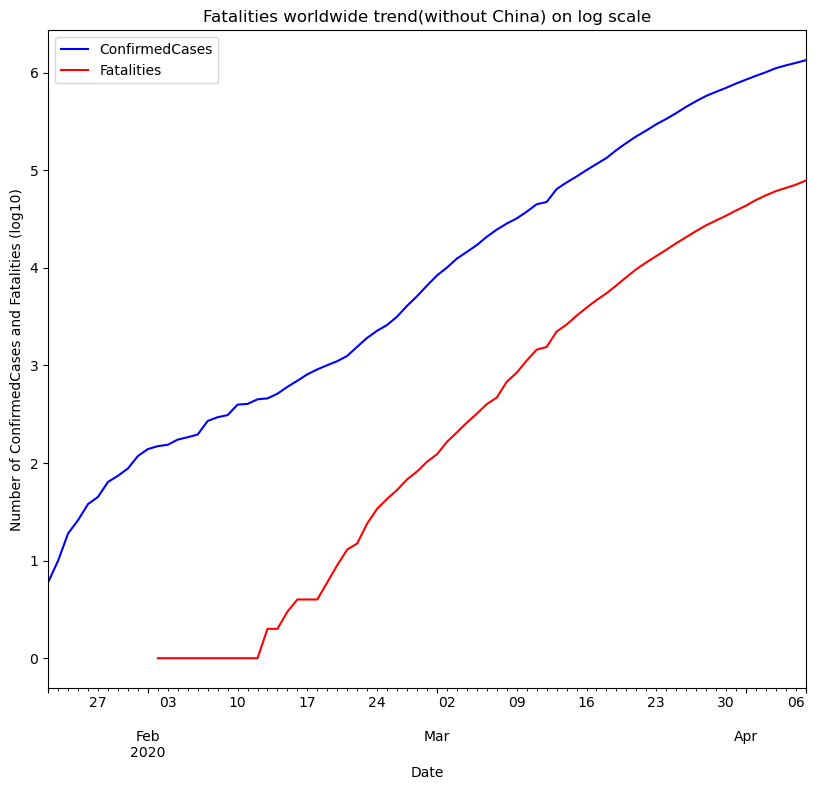

In [132]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
np.log10(train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum()).plot(color='red')
plt.ylabel('Number of ConfirmedCases and Fatalities (log10)')
plt.title("Fatalities worldwide trend(without China) on log scale")
plt.legend()
plt.tight_layout()
     

## Conclusion of Exploratory Data Analysis:

#### 1.China
#### According to the news and media Covid-19 has been started from China and the first case was reported in December 2019. The data published on Kaggle has a start date of data collection from 22nd Jan 2020 onwards and by that time in China the confirmed cases were 533.

#### 2.Italy
#### Italy has confirmed first case in the end of Jan 2020 (i.e. a month later to China). Italy surpasses China in confirmed cases around 3-4 week of March 2020